In [8]:
!pip install wbdata

  Using cached wbdata-1.1.0-py3-none-any.whl.metadata (2.1 kB)
  Using cached appdirs-1.4.4-py2.py3-none-any.whl.metadata (9.0 kB)
  Using cached cachetools-5.5.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached shelved_cache-0.3.1-py3-none-any.whl.metadata (4.7 kB)
  Using cached tabulate-0.9.0-py3-none-any.whl.metadata (34 kB)
  Using cached tzlocal-5.3.1-py3-none-any.whl.metadata (7.6 kB)
Using cached wbdata-1.1.0-py3-none-any.whl (18 kB)
Using cached appdirs-1.4.4-py2.py3-none-any.whl (9.6 kB)
Using cached cachetools-5.5.2-py3-none-any.whl (10 kB)
Using cached shelved_cache-0.3.1-py3-none-any.whl (7.8 kB)
Using cached tabulate-0.9.0-py3-none-any.whl (35 kB)
Using cached tzlocal-5.3.1-py3-none-any.whl (18 kB)
  Attempting uninstall: cachetools
    Found existing installation: cachetools 6.2.1
    Uninstalling cachetools-6.2.1:
      Successfully uninstalled cachetools-6.2.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [wbdata]2m5/7 [dateparser]


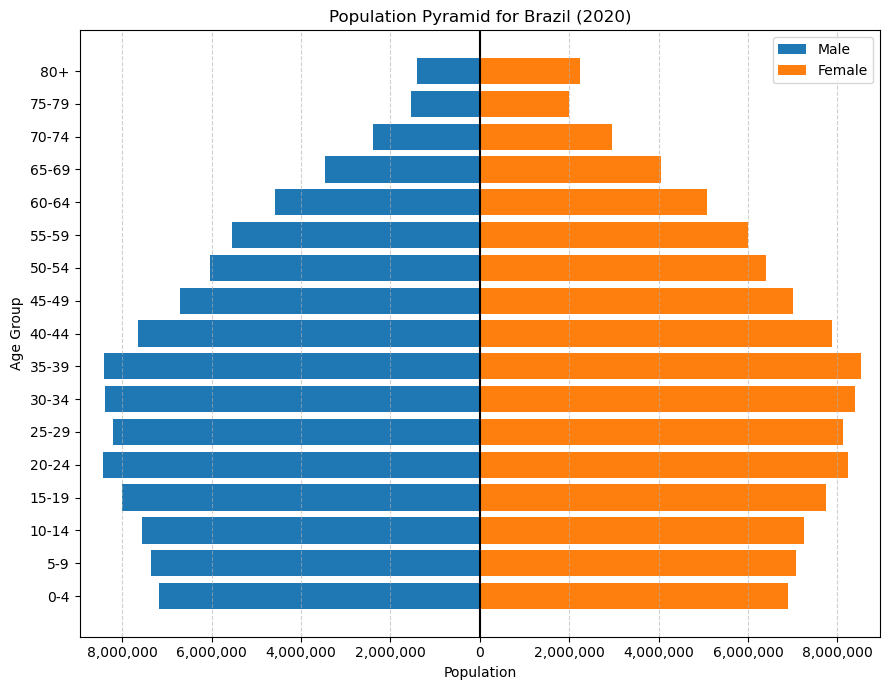

In [23]:
import wbdata
import pandas as pd
import matplotlib.pyplot as plt

country = "BRA"
year = "2020"

# 5-year cohorts + 80+
age_codes = [
    ("0004", "0-4"),
    ("0509", "5-9"),
    ("1014", "10-14"),
    ("1519", "15-19"),
    ("2024", "20-24"),
    ("2529", "25-29"),
    ("3034", "30-34"),
    ("3539", "35-39"),
    ("4044", "40-44"),
    ("4549", "45-49"),
    ("5054", "50-54"),
    ("5559", "55-59"),
    ("6064", "60-64"),
    ("6569", "65-69"),
    ("7074", "70-74"),
    ("7579", "75-79"),
    ("80UP", "80+"),
]

# Build indicators dict automatically
indicators = {}
for code, label in age_codes:
    indicators[f"SP.POP.{code}.MA"] = f"Male {label}"
    indicators[f"SP.POP.{code}.FE"] = f"Female {label}"

# Fetch data for the year
df = wbdata.get_dataframe(indicators, country=country, date=(year, year))

# Some wbdata setups return an index like '2020', others a date-like index.
# This works robustly either way:
row = df.iloc[0]

ages = [label for _, label in age_codes]
male = [-row[f"Male {label}"] for label in ages]      # negative so bars go left
female = [row[f"Female {label}"] for label in ages]   # positive so bars go right

# Plot
fig, ax = plt.subplots(figsize=(9, 7))
ax.barh(ages, male, label="Male")
ax.barh(ages, female, label="Female")
ax.axvline(0, color="black")

# Symmetric x-limits
max_val = max(max(abs(v) for v in male), max(female))
ax.set_xlim(-max_val * 1.05, max_val * 1.05)

# Show positive values on both sides
ax.xaxis.set_major_formatter(
    mtick.FuncFormatter(lambda x, pos: f'{abs(int(x)):,}')
)

ax.set_title(f"Population Pyramid for Brazil ({year})")
ax.set_xlabel("Population")
ax.set_ylabel("Age Group")
ax.grid(axis="x", linestyle="--", alpha=0.6)
ax.legend()

plt.tight_layout()
plt.show()


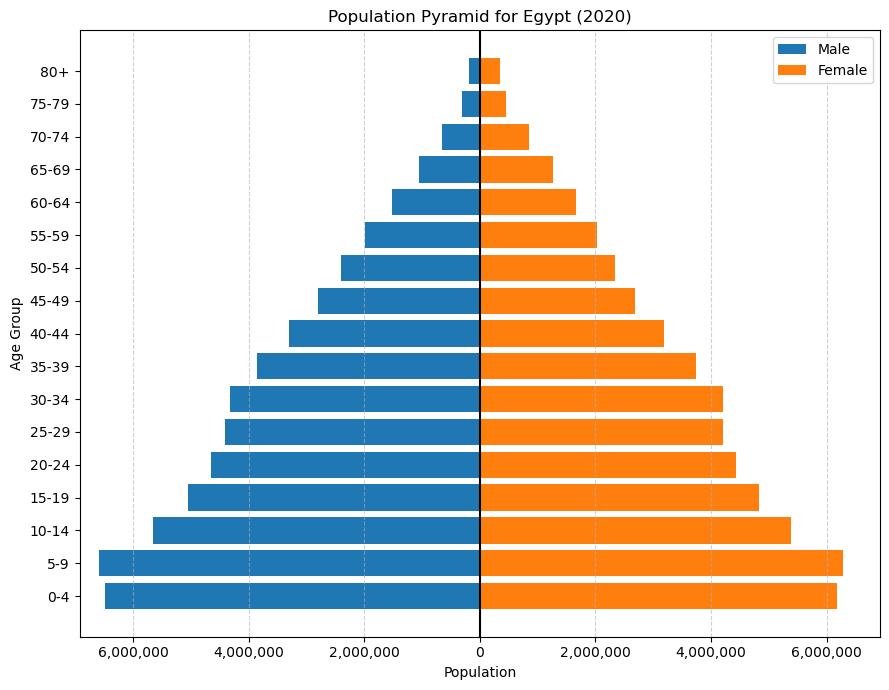

In [22]:
import wbdata
import pandas as pd
import matplotlib.pyplot as plt

country = "EGY"   # Egypt
year = "2020"

# 5-year cohorts + 80+
age_codes = [
    ("0004", "0-4"),
    ("0509", "5-9"),
    ("1014", "10-14"),
    ("1519", "15-19"),
    ("2024", "20-24"),
    ("2529", "25-29"),
    ("3034", "30-34"),
    ("3539", "35-39"),
    ("4044", "40-44"),
    ("4549", "45-49"),
    ("5054", "50-54"),
    ("5559", "55-59"),
    ("6064", "60-64"),
    ("6569", "65-69"),
    ("7074", "70-74"),
    ("7579", "75-79"),
    ("80UP", "80+"),
]

# Build indicators dict automatically
indicators = {}
for code, label in age_codes:
    indicators[f"SP.POP.{code}.MA"] = f"Male {label}"
    indicators[f"SP.POP.{code}.FE"] = f"Female {label}"

# Fetch data for the year
df = wbdata.get_dataframe(indicators, country=country, date=(year, year))

row = df.iloc[0]

ages = [label for _, label in age_codes]
male = [-row[f"Male {label}"] for label in ages]      # negative so bars go left
female = [row[f"Female {label}"] for label in ages]   # positive so bars go right

# Plot
fig, ax = plt.subplots(figsize=(9, 7))
ax.barh(ages, male, label="Male")
ax.barh(ages, female, label="Female")
ax.axvline(0, color="black")

max_val = max(max(abs(v) for v in male), max(female))
ax.set_xlim(-max_val * 1.05, max_val * 1.05)

# Make x-axis labels positive on both sides
import matplotlib.ticker as mtick
ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: f'{abs(int(x)):,}'))

ax.set_title(f"Population Pyramid for Egypt ({year})")
ax.set_xlabel("Population")
ax.set_ylabel("Age Group")
ax.grid(axis="x", linestyle="--", alpha=0.6)
ax.legend()

plt.tight_layout()
plt.show()



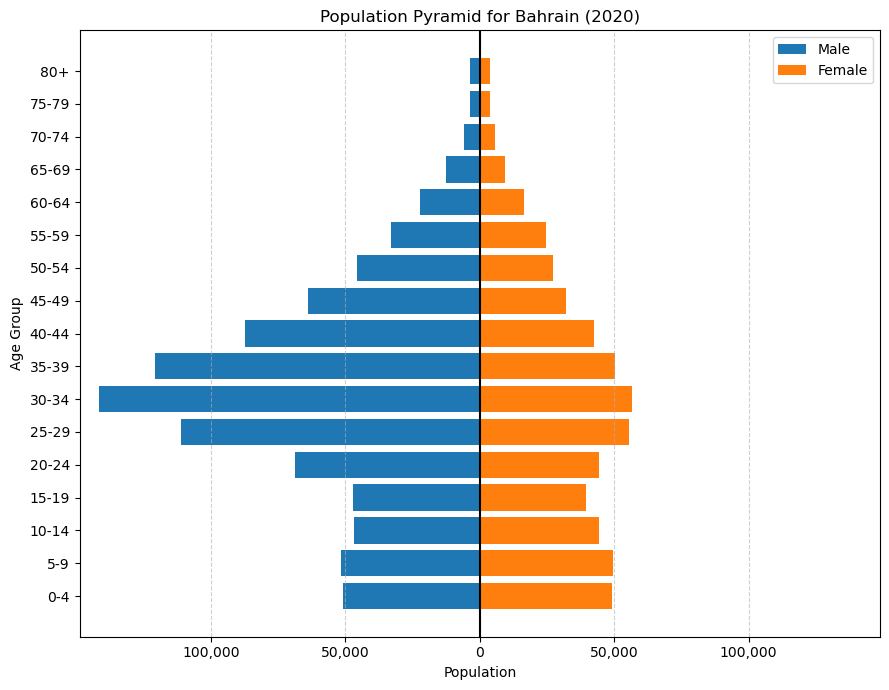

In [25]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

country = "BHR"
year = "2020"

age_codes = [
    ("0004", "0-4"),
    ("0509", "5-9"),
    ("1014", "10-14"),
    ("1519", "15-19"),
    ("2024", "20-24"),
    ("2529", "25-29"),
    ("3034", "30-34"),
    ("3539", "35-39"),
    ("4044", "40-44"),
    ("4549", "45-49"),
    ("5054", "50-54"),
    ("5559", "55-59"),
    ("6064", "60-64"),
    ("6569", "65-69"),
    ("7074", "70-74"),
    ("7579", "75-79"),
    ("80UP", "80+"),
]

def fetch_value(country_code: str, indicator: str, year: str) -> float:
    url = f"https://api.worldbank.org/v2/country/{country_code}/indicator/{indicator}"
    r = requests.get(url, params={"date": year, "format": "json", "per_page": 20000}, timeout=30)

    # If the API returns HTML/empty/etc., this makes it obvious
    r.raise_for_status()
    try:
        data = r.json()
    except Exception:
        raise RuntimeError(f"Non-JSON response from World Bank API:\n{r.text[:300]}")

    # data looks like: [metadata, [ { 'value': ...}, ... ]]
    series = data[1]
    if not series or series[0].get("value") is None:
        return float("nan")
    return float(series[0]["value"])

# Build values
ages = [label for _, label in age_codes]
male = []
female = []

for code, label in age_codes:
    m_ind = f"SP.POP.{code}.MA"
    f_ind = f"SP.POP.{code}.FE"
    m_val = fetch_value(country, m_ind, year)
    f_val = fetch_value(country, f_ind, year)
    male.append(-m_val)     # negative so bars go left
    female.append(f_val)    # positive so bars go right

# Plot
fig, ax = plt.subplots(figsize=(9, 7))
ax.barh(ages, male, label="Male")
ax.barh(ages, female, label="Female")
ax.axvline(0, color="black")

max_val = max(max(abs(v) for v in male if pd.notna(v)), max(v for v in female if pd.notna(v)))
ax.set_xlim(-max_val * 1.05, max_val * 1.05)

# Show positive tick labels on both sides
ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: f"{abs(int(x)):,}"))

ax.set_title(f"Population Pyramid for Bahrain ({year})")
ax.set_xlabel("Population")
ax.set_ylabel("Age Group")
ax.grid(axis="x", linestyle="--", alpha=0.6)
ax.legend()

plt.tight_layout()
plt.show()


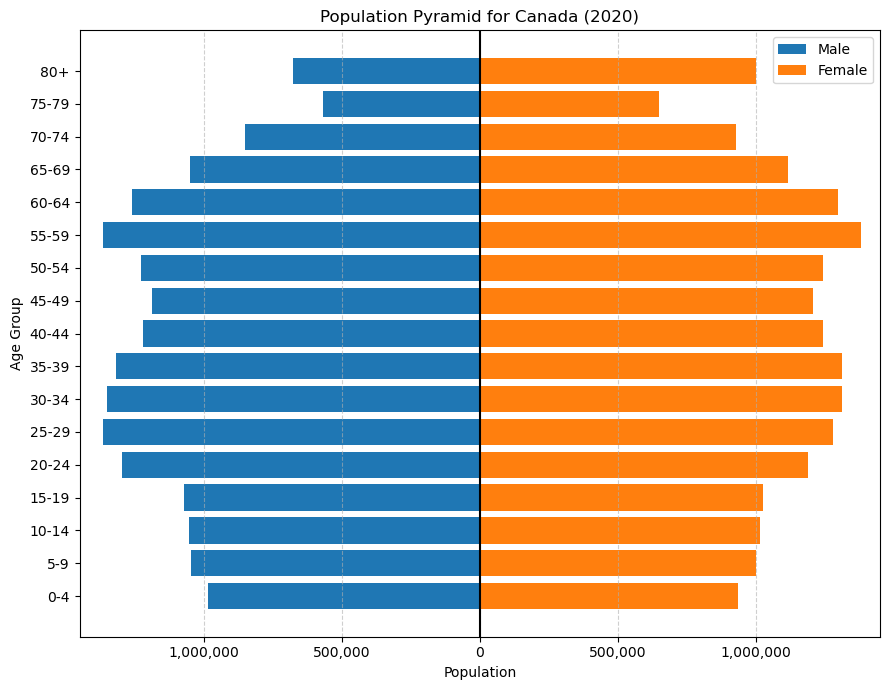

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

country = "CAN"   # <-- Canada ISO3 code
year = "2020"

age_codes = [
    ("0004", "0-4"),
    ("0509", "5-9"),
    ("1014", "10-14"),
    ("1519", "15-19"),
    ("2024", "20-24"),
    ("2529", "25-29"),
    ("3034", "30-34"),
    ("3539", "35-39"),
    ("4044", "40-44"),
    ("4549", "45-49"),
    ("5054", "50-54"),
    ("5559", "55-59"),
    ("6064", "60-64"),
    ("6569", "65-69"),
    ("7074", "70-74"),
    ("7579", "75-79"),
    ("80UP", "80+"),
]

def fetch_value(country_code: str, indicator: str, year: str) -> float:
    url = f"https://api.worldbank.org/v2/country/{country_code}/indicator/{indicator}"
    r = requests.get(url, params={"date": year, "format": "json", "per_page": 20000}, timeout=30)

    r.raise_for_status()
    try:
        data = r.json()
    except Exception:
        raise RuntimeError(f"Non-JSON response from World Bank API:\n{r.text[:300]}")

    series = data[1]
    if not series or series[0].get("value") is None:
        return float("nan")
    return float(series[0]["value"])

# Build values
ages = [label for _, label in age_codes]
male = []
female = []

for code, label in age_codes:
    m_ind = f"SP.POP.{code}.MA"
    f_ind = f"SP.POP.{code}.FE"
    m_val = fetch_value(country, m_ind, year)
    f_val = fetch_value(country, f_ind, year)
    male.append(-m_val)     # negative so bars go left
    female.append(f_val)    # positive so bars go right

# Plot
fig, ax = plt.subplots(figsize=(9, 7))
ax.barh(ages, male, label="Male")
ax.barh(ages, female, label="Female")
ax.axvline(0, color="black")

max_val = max(
    max(abs(v) for v in male if pd.notna(v)),
    max(v for v in female if pd.notna(v))
)
ax.set_xlim(-max_val * 1.05, max_val * 1.05)

# Show positive tick labels on both sides
ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: f"{abs(int(x)):,}"))

ax.set_title(f"Population Pyramid for Canada ({year})")
ax.set_xlabel("Population")
ax.set_ylabel("Age Group")
ax.grid(axis="x", linestyle="--", alpha=0.6)
ax.legend()

plt.tight_layout()
plt.show()


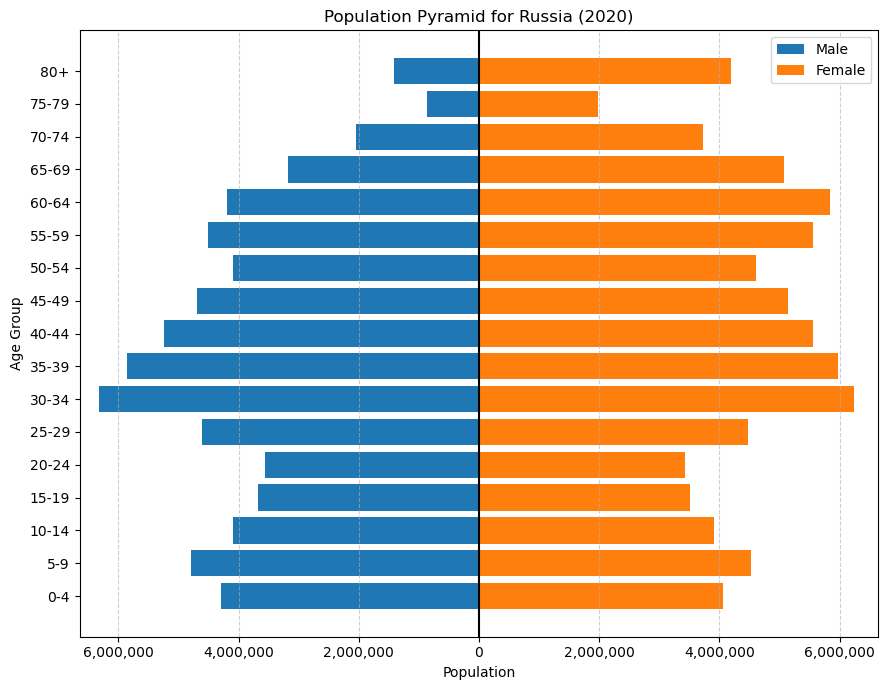

In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

country = "RUS"   # <-- Russia ISO3 code
year = "2020"

age_codes = [
    ("0004", "0-4"),
    ("0509", "5-9"),
    ("1014", "10-14"),
    ("1519", "15-19"),
    ("2024", "20-24"),
    ("2529", "25-29"),
    ("3034", "30-34"),
    ("3539", "35-39"),
    ("4044", "40-44"),
    ("4549", "45-49"),
    ("5054", "50-54"),
    ("5559", "55-59"),
    ("6064", "60-64"),
    ("6569", "65-69"),
    ("7074", "70-74"),
    ("7579", "75-79"),
    ("80UP", "80+"),
]

def fetch_value(country_code: str, indicator: str, year: str) -> float:
    url = f"https://api.worldbank.org/v2/country/{country_code}/indicator/{indicator}"
    r = requests.get(url, params={"date": year, "format": "json", "per_page": 20000}, timeout=30)

    r.raise_for_status()
    try:
        data = r.json()
    except Exception:
        raise RuntimeError(f"Non-JSON response from World Bank API:\n{r.text[:300]}")

    series = data[1]
    if not series or series[0].get("value") is None:
        return float("nan")
    return float(series[0]["value"])

# Build values
ages = [label for _, label in age_codes]
male = []
female = []

for code, label in age_codes:
    m_ind = f"SP.POP.{code}.MA"
    f_ind = f"SP.POP.{code}.FE"
    m_val = fetch_value(country, m_ind, year)
    f_val = fetch_value(country, f_ind, year)
    male.append(-m_val)
    female.append(f_val)

# Plot
fig, ax = plt.subplots(figsize=(9, 7))
ax.barh(ages, male, label="Male")
ax.barh(ages, female, label="Female")
ax.axvline(0, color="black")

max_val = max(
    max(abs(v) for v in male if pd.notna(v)),
    max(v for v in female if pd.notna(v))
)
ax.set_xlim(-max_val * 1.05, max_val * 1.05)

# Show positive tick labels on both sides
ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: f"{abs(int(x)):,}"))

ax.set_title(f"Population Pyramid for Russia ({year})")
ax.set_xlabel("Population")
ax.set_ylabel("Age Group")
ax.grid(axis="x", linestyle="--", alpha=0.6)
ax.legend()

plt.tight_layout()
plt.show()


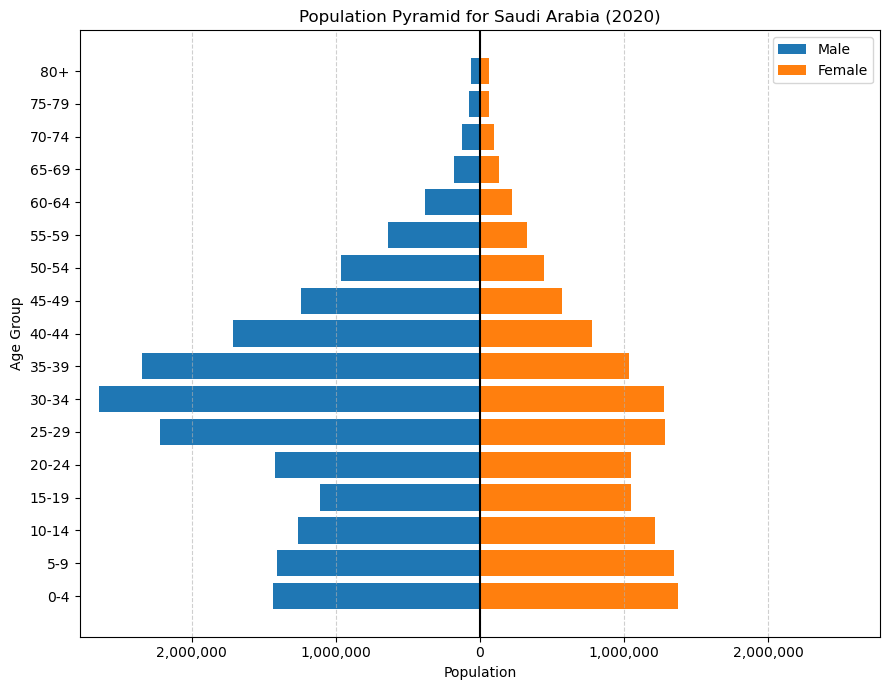

In [4]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

country = "SAU"   # <-- Saudi Arabia ISO3 code
year = "2020"

age_codes = [
    ("0004", "0-4"),
    ("0509", "5-9"),
    ("1014", "10-14"),
    ("1519", "15-19"),
    ("2024", "20-24"),
    ("2529", "25-29"),
    ("3034", "30-34"),
    ("3539", "35-39"),
    ("4044", "40-44"),
    ("4549", "45-49"),
    ("5054", "50-54"),
    ("5559", "55-59"),
    ("6064", "60-64"),
    ("6569", "65-69"),
    ("7074", "70-74"),
    ("7579", "75-79"),
    ("80UP", "80+"),
]

def fetch_value(country_code: str, indicator: str, year: str) -> float:
    url = f"https://api.worldbank.org/v2/country/{country_code}/indicator/{indicator}"
    r = requests.get(url, params={"date": year, "format": "json", "per_page": 20000}, timeout=30)

    r.raise_for_status()
    data = r.json()

    series = data[1]
    if not series or series[0].get("value") is None:
        return float("nan")
    return float(series[0]["value"])

# Build values
ages = [label for _, label in age_codes]
male = []
female = []

for code, label in age_codes:
    m_ind = f"SP.POP.{code}.MA"
    f_ind = f"SP.POP.{code}.FE"
    m_val = fetch_value(country, m_ind, year)
    f_val = fetch_value(country, f_ind, year)
    male.append(-m_val)
    female.append(f_val)

# Plot
fig, ax = plt.subplots(figsize=(9, 7))
ax.barh(ages, male, label="Male")
ax.barh(ages, female, label="Female")
ax.axvline(0, color="black")

max_val = max(
    max(abs(v) for v in male if pd.notna(v)),
    max(v for v in female if pd.notna(v))
)
ax.set_xlim(-max_val * 1.05, max_val * 1.05)

# Show positive tick labels on both sides
ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: f"{abs(int(x)):,}"))

ax.set_title(f"Population Pyramid for Saudi Arabia ({year})")
ax.set_xlabel("Population")
ax.set_ylabel("Age Group")
ax.grid(axis="x", linestyle="--", alpha=0.6)
ax.legend()

plt.tight_layout()
plt.show()


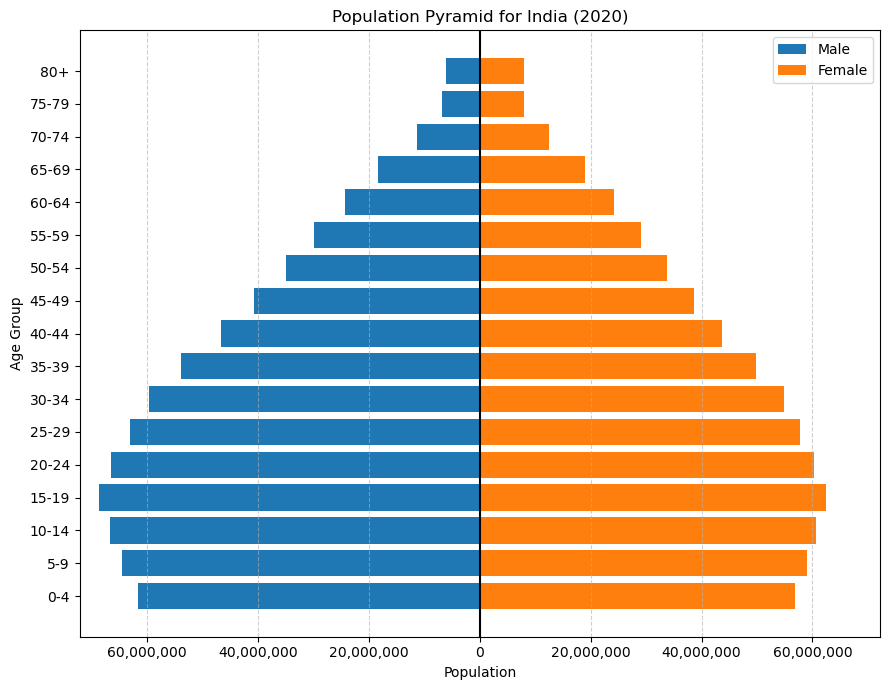

In [5]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

country = "IND"   # <-- India ISO3 code
year = "2020"

age_codes = [
    ("0004", "0-4"),
    ("0509", "5-9"),
    ("1014", "10-14"),
    ("1519", "15-19"),
    ("2024", "20-24"),
    ("2529", "25-29"),
    ("3034", "30-34"),
    ("3539", "35-39"),
    ("4044", "40-44"),
    ("4549", "45-49"),
    ("5054", "50-54"),
    ("5559", "55-59"),
    ("6064", "60-64"),
    ("6569", "65-69"),
    ("7074", "70-74"),
    ("7579", "75-79"),
    ("80UP", "80+"),
]

def fetch_value(country_code: str, indicator: str, year: str) -> float:
    url = f"https://api.worldbank.org/v2/country/{country_code}/indicator/{indicator}"
    r = requests.get(url, params={"date": year, "format": "json", "per_page": 20000}, timeout=30)

    r.raise_for_status()
    data = r.json()

    series = data[1]
    if not series or series[0].get("value") is None:
        return float("nan")
    return float(series[0]["value"])

# Build values
ages = [label for _, label in age_codes]
male = []
female = []

for code, label in age_codes:
    m_ind = f"SP.POP.{code}.MA"
    f_ind = f"SP.POP.{code}.FE"
    m_val = fetch_value(country, m_ind, year)
    f_val = fetch_value(country, f_ind, year)
    male.append(-m_val)
    female.append(f_val)

# Plot
fig, ax = plt.subplots(figsize=(9, 7))
ax.barh(ages, male, label="Male")
ax.barh(ages, female, label="Female")
ax.axvline(0, color="black")

max_val = max(
    max(abs(v) for v in male if pd.notna(v)),
    max(v for v in female if pd.notna(v))
)
ax.set_xlim(-max_val * 1.05, max_val * 1.05)

# Show positive tick labels on both sides
ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: f"{abs(int(x)):,}"))

ax.set_title(f"Population Pyramid for India ({year})")
ax.set_xlabel("Population")
ax.set_ylabel("Age Group")
ax.grid(axis="x", linestyle="--", alpha=0.6)
ax.legend()

plt.tight_layout()
plt.show()
